# Our journey from analysis to prediction includes:

* **Understanding the data**
* **Data Preprocessing and Cleaning**
* **Exploratory data analysis (EDA)**
* **Data Modeling**
* **Model Evaluation**

> ##   Importing Libraries
> * pandas: A library for data manipulation and analysis, offering powerful data structures like DataFrames for handling structured data efficiently.
> * numpy: A library for numerical computing, providing support for arrays, matrices, and high-level mathematical operations.
> * matplotlib.pyplot: A plotting library used for creating static, interactive, and animated visualizations.
> * seaborn: A data visualization library built on top of Matplotlib, offering a high-level interface for creating attractive and informative statistical graphics.
> * scipy.stats: A module within SciPy for performing statistical tests, probability distributions, and other statistical functions.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import display
from collections import Counter

> ## Reading the Dataset with Pandas

> **"Let's start by reading the data using pandas. However, there are some important points to consider to avoid errors during data reading.**
>
> 1. First, it's crucial to select the encoding as **'latin1'** because if we don't, it will result in a character encoding error. So, **use: encoding='latin1'**.
>
> 1. Secondly, since our data doesn't have column names, we need to specify the header as None. Otherwise, pandas will treat the first row as the header and assign it as column names by default. So, **use: header=None."**

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [3]:
data = pd.read_csv(r"/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding="latin1", header=None)

# 1. Understanding the Data
**Let’s take a closer look at our dataset to better understand its structure and content.**

> **Let’s use the shape attribute from pandas. It provides the number of rows and columns in a DataFrame, helping us understand the dataset’s structure.
We found that the dataset consists of 1,600,000 rows and 6 columns.**

In [4]:
data.shape

(1600000, 6)

> **Let’s also use the head() function from pandas. It gives us a quick look at the first few rows of the dataset. By default, it shows the first 5 rows, but you can specify a different number by passing an argument, such as head(10) to display the first 10 rows.**

In [5]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


> **"After displaying the data, you'll notice that the columns have been assigned names from 0 to 5. However, now we need to rename the columns with meaningful names that reflect their content."**

In [6]:
columns = ["sentiment", "ids", "date", "flag", "user", "tweet"]
data.columns= columns
data.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


> **Let’s display information about the data using info(). This function performs the tasks of both the shape and dtypes attributes, but in addition, it shows the number of rows and columns, the data type of each column, and whether any column contains null values.**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# 2. Data Preprocessing and Cleaning
**Now, let's move on to data preprocessing and cleaning to ensure our dataset is well-structured and ready for analysis and modeling.**

> "First, we need to focus on the most relevant features in our dataset: **'tweet'** and **'sentiment'**. The rest of the columns are not important.
>
> * **'tweet'** is the independent feature **(input)** that we'll use to predict sentiment.
> * **'sentiment'** is the target variable **(output)** that represents the sentiment classification."

In [8]:
df = data[["tweet", "sentiment"]].copy()
df.head()

,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


## Cleaning Tweets:
**To improve the quality of our dataset, we need to clean the tweets by removing unnecessary elements like links, special characters, and stopwords. Let's go through the function step by step:**

> **1. Importing Required LibrariesWe first import the necessary libraries for text processing:**
>
> * **re:** For regular expressions, which help in text cleaning.
> * **nltk:** A powerful library for natural language processing (NLP).
> * **stopwords from nltk.corpus:** A list of common words (e.g., "the", "is", "and") that don't add much meaning.
> * **PorterStemmer:** A stemming algorithm that reduces words to their root form (e.g., "running" → "run").
> * **STOPWORDS from wordcloud**: Another set of common words to remove.
>
> **2. Downloading and Defining Stopwords:**
> * We download the stopwords list using nltk.download('stopwords').
> * We create a set of stopwords for faster lookups.
> * We add extra stopwords: "amp", "rt", "lt", and "gt" (often seen in tweets but aren't meaningful).
>
> **3. The clean_tweet Function:**
> * **tweet = tweet.lower()** >>> Converting to Lowercase
> * **tweet = re.sub(r"https?://\S+", "", tweet)** >>> Removing URLs
> * **tweet = re.sub(r"@\w+|#", "", tweet)** >>> Removing Mentions(@username) and Hashtags(#happy → happy)
> * **tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)** >>> Removing Special Characters and Numbers
> * **tweet = " ".join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])** >>> Tokenization, Stopword Removal, and Stemming
>
> **Final Cleaned Tweet Output:**
> * After processing, a tweet like:
📌 **"RT @user: Check this out! https://www.kaggle.com/mohamedhelmyali #amazing"**
> * Will be cleaned to:
✅ **"check amazing"**

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import STOPWORDS

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(["amp", "rt", "lt", "gt"])

stemmer = PorterStemmer()

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https?://\S+", "", tweet)
    tweet = re.sub(r"@\w+|#", "", tweet)
    tweet = re.sub(r"[^\w\s]|[\d]", "", tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split() if word not in stop_words])
    return tweet

df["clean_tweet"] = df["tweet"].apply(clean_tweet)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,0,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,0,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,0,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",0,behav im mad cant see


# 3. Exploratory Data Analysis - EDA
**After cleaning the data, the next step is to understand its characteristics using statistical analysis and visualizations.**

> **"First, we'll convert the sentiment labels to their original meanings for better readability:**
>
> * 0 → Negative 😠
> * 4 → Positive 😊

## 3.1 Date and Tweet IDs

### 3.1.1 Date

I want to find out what is the time interval spanned in the data.

In [10]:
data['date'] = pd.to_datetime(data['date'])

data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year

data.head()

<ipython-input-10-1320464693>:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['date'] = pd.to_datetime(data['date'])


,sentiment,ids,date,flag,user,tweet,month,year
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",April,2009
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,April,2009
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,April,2009
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,April,2009
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",April,2009


In [11]:
df["sentiment"] = df["sentiment"].replace({0: "Negative", 4: "Positive"})
df.head()

,tweet,sentiment,clean_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see


In [12]:
print(f'The data spans the year(s) {data.year.unique()[0]} and the month(s) {list(data.month.unique())}.')

The data spans the year(s) 2009 and the month(s) ['April', 'May', 'June'].


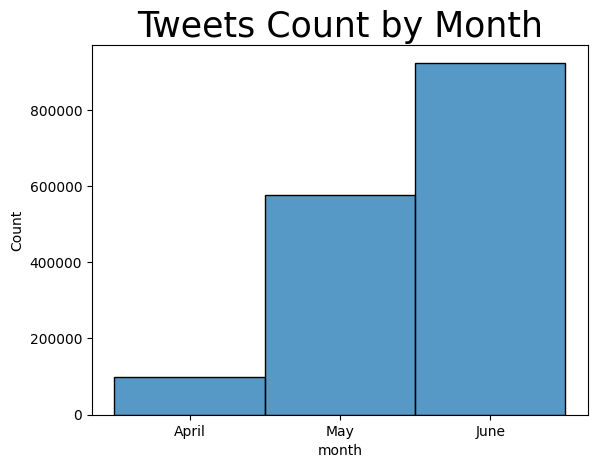

In [13]:
sns.histplot(data.month)
plt.title('Tweets Count by Month', size=25);

### 3.1.2 Tweet IDs

In [14]:
print(f'There are {data.ids.nunique()} unique tweet IDs and {len(data)} rows in the dataset.')
print(f'The ratio between them is {data.ids.nunique() / len(data):.3f}.')

There are 1598315 unique tweet IDs and 1600000 rows in the dataset.
The ratio between them is 0.999.


Although there is not perfect match between the number the number of unique tweet IDs and the number of rows, their ratio is very close to 1. This is why the `ids` column is not necessary and can be dropped.

## 3.2 Users, Target Variable and Text

### 3.2.1 Users

In [15]:
print(f'There are {data.user.nunique()} unique users. They wrote {len(data)} tweets in total.')

There are 659775 unique users. They wrote 1600000 tweets in total.


Let's find out who are the users with the most tweets and also categorize the users by the number of tweets.

<ipython-input-16-1694295202>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45, size=8)


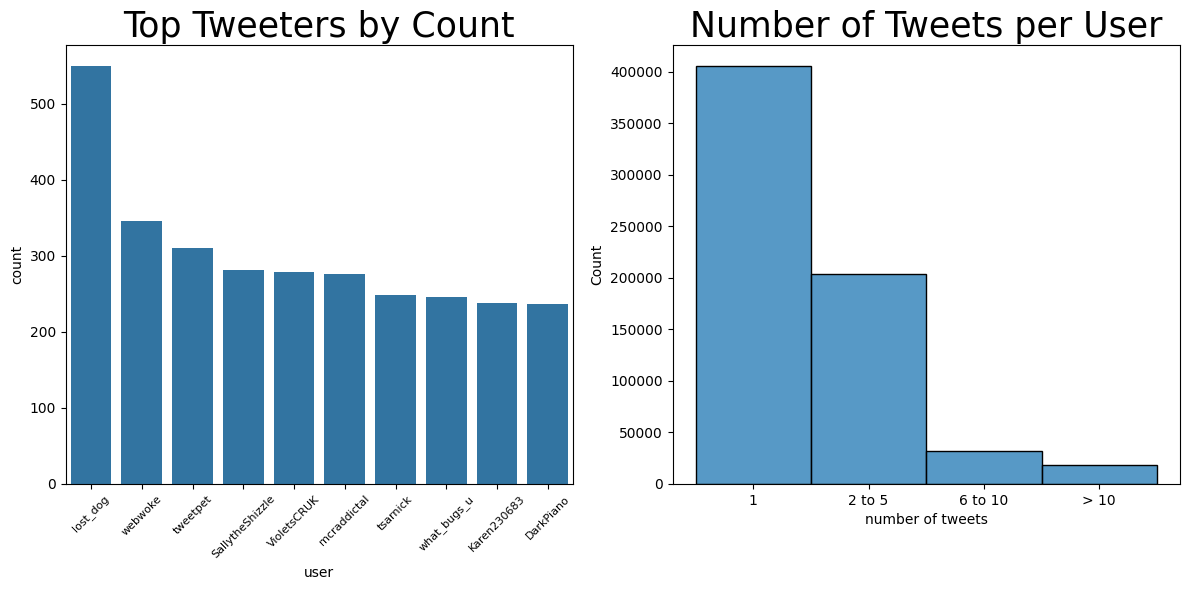

In [16]:

tweet_user_count = data.user.value_counts().reset_index()

top_10_tweeters = tweet_user_count.sort_values(by='count', ascending=False).head(10)

tweet_user_count['number of tweets'] = pd.cut(tweet_user_count['count'],
                                bins=[0, 1, 5, 10, 1000],
                                labels=['1', '2 to 5', '6 to 10', '> 10'])


fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=top_10_tweeters, x='user', y='count', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45, size=8)
ax1.set_title('Top Tweeters by Count', size=25)

ax2 = sns.histplot(tweet_user_count['number of tweets'], ax=ax2)
ax2.set_title('Number of Tweets per User', size=25)

plt.tight_layout()

### 3.2.2 Target Variable

I am plotting the sentiment and also replace the target class `4` with `1` for clarity.

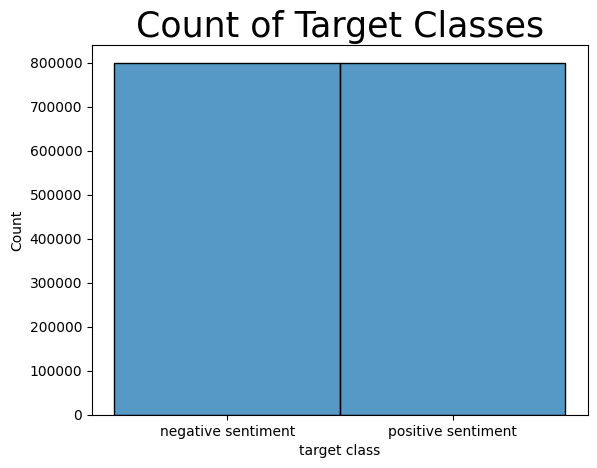

In [20]:
data.loc[data.sentiment == 4, 'target'] = 1

data.loc[data.sentiment == 0, 'target class'] = 'negative sentiment'
data.loc[data.sentiment == 1, 'target class'] = 'positive sentiment'

sns.histplot(data['target class'])
plt.title('Count of Target Classes', size=25);

I am also interested in the count of the target class (`negative sentiment` or `positive sentiment`) depending on the user category `number of tweets`.

### 3.2.3 Text

I am having a look at the most frequent words in the `text` column.


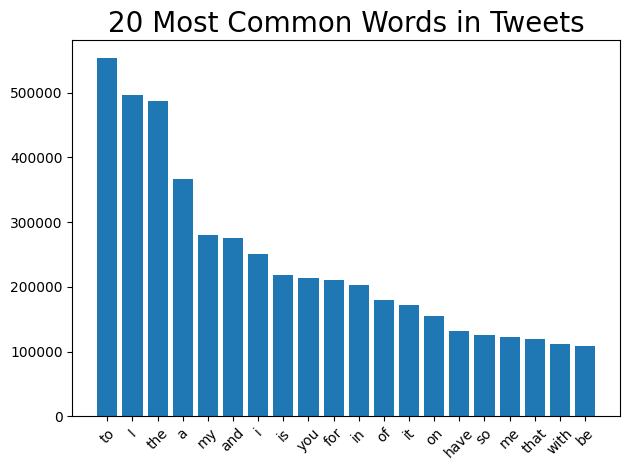

In [22]:

most_common_words = Counter(" ".join(data["tweet"]).split()).most_common(20)

x,y = zip(*most_common_words)

plt.bar(x, y)
plt.xticks(rotation=45)
plt.title("20 Most Common Words in Tweets",size=20)

plt.tight_layout()
plt.show()

<ipython-input-23-810690083>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_class_sentiment = user_count_target_class.groupby(['number of tweets', 'target class'])['count'].sum().reset_index()


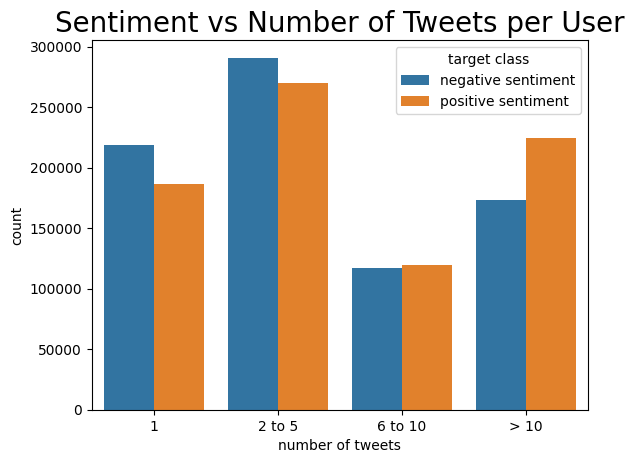

In [23]:
user_count_target_class = data.groupby(['user', 'target class'])['user'].value_counts().reset_index()

user_count_target_class = user_count_target_class.merge(tweet_user_count.drop('count', axis=1), on='user')

target_class_sentiment = user_count_target_class.groupby(['number of tweets', 'target class'])['count'].sum().reset_index()


sns.barplot(data=target_class_sentiment, x='number of tweets', y='count', hue='target class')
plt.title('Sentiment vs Number of Tweets per User', size=20);

This plot shows an interesting trend: while in the categories of the users with a low tweet production (`1` and `2 to 5`) the negative sentiment slightly dominates, in the categories of the users with a higher tweet production (`6 to 10` and `> 10`) the positive sentiment is more likely. This would indicate that the majority of the frequent users of Twitter would write something that is positive, rather than a comment that is negative or critical. This would probably grant the frequent users of Twitter more favorable comment or likes from the other users.

This plot shows that the most frequent words in the dataset are stopwords. Thus, in order to carry out the classification procedure, I will have to remove stopwords first and, in general, preprocess the text.

> 4. **Sentiment Distribution**
> * Objective: Determine whether the dataset is balanced or biased toward a particular sentiment.
> * We'll visualize the count of each sentiment class using pie chart

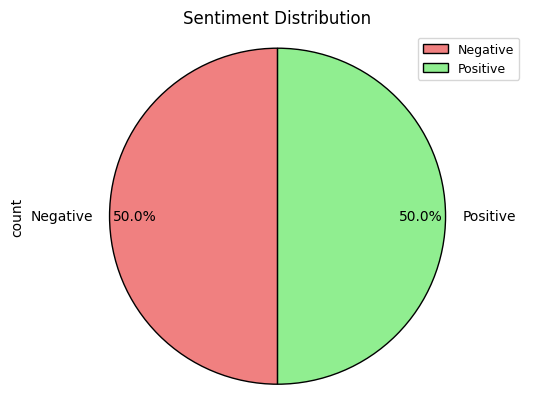

In [24]:
import matplotlib.pyplot as plt

df["sentiment"].value_counts().plot(kind="pie",
                                    autopct='%1.1f%%',
                                    pctdistance=0.85,
                                    startangle=90,
                                    colors=["lightcoral", "lightgreen"],
                                    wedgeprops={'edgecolor': 'black'})

plt.title('Sentiment Distribution')
plt.axis('equal')
plt.legend(labels=df["sentiment"].value_counts().index,
           loc='upper right', fontsize=9)
plt.show()


> **2. Most Common Words in Each Sentiment (Word Clouds)**
> * **Objective:** Identify words commonly associated with positive and negative sentiments.
> * **A word cloud** is a great way to see the most frequent words in each sentiment category.
> * This helps us understand what kind of words contribute to positive or negative emotions.

> **"Let's start with generating the word cloud for positive sentiment."
In this step, we'll extract tweets that are labeled as positive and create a word cloud to visually represent the most common words used.**

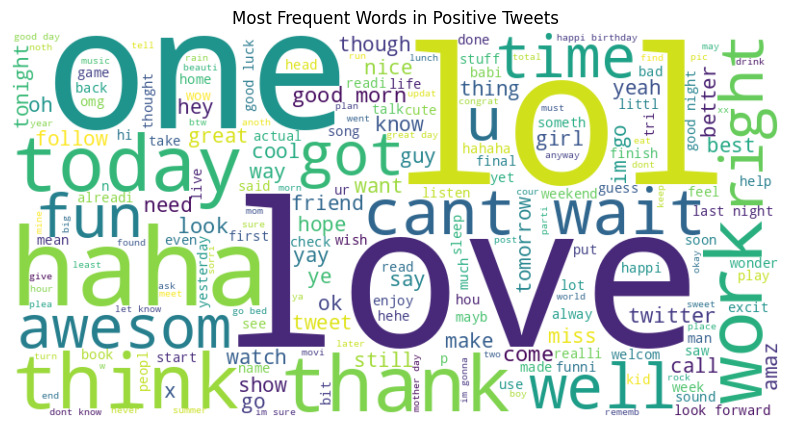

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = " ".join(df[df["sentiment"] == "Positive"]["clean_tweet"])
negative_words = " ".join(df[df["sentiment"] == "Negative"]["clean_tweet"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

> **Now, let's move on to generating the word cloud for negative sentiment."
In this step, we'll extract tweets labeled as negative and create a word cloud that highlights the most common words used.**

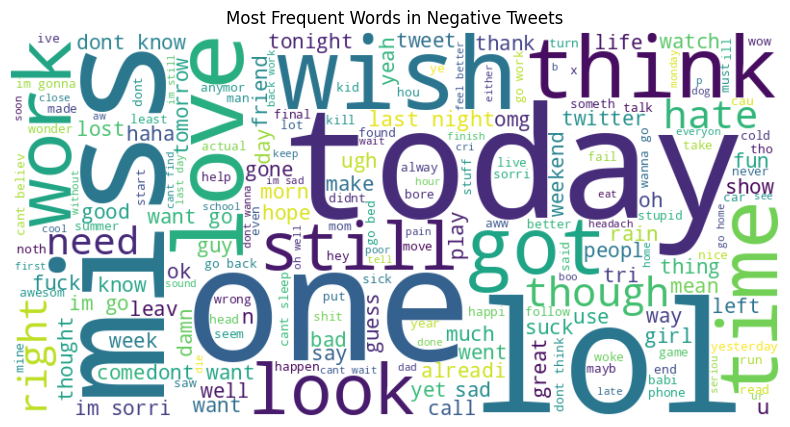

In [26]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Tweets")
plt.show()

> **Note:**
>> **After displaying the results, you'll notice that some words are common across both positive and negative sentiment classes. However, their frequency of occurrence varies between the two classes.**

>  **3. Tweet Length Distribution**
> * Objective: Analyze the average length of tweets and its impact on sentiment.
> * We'll visualize the result using histogram and bar chart

> **First, we need to add a new feature to our dataset: the length of the tweets.**

In [27]:
df["tweet_length"] = df["clean_tweet"].apply(lambda x: len(x.split()))
df.head()

,tweet,sentiment,clean_tweet,tweet_length
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative,awww that bummer shoulda got david carr third day,9
1,is upset that he can't update his Facebook by ...,Negative,upset cant updat facebook text might cri resul...,12
2,@Kenichan I dived many times for the ball. Man...,Negative,dive mani time ball manag save rest go bound,9
3,my whole body feels itchy and like its on fire,Negative,whole bodi feel itchi like fire,6
4,"@nationwideclass no, it's not behaving at all....",Negative,behav im mad cant see,5


> **Let's filter the data to check if there are any tweets with a length of zero after cleaning them using the `clean_tweet` function. We'll then compare these tweets with their original versions before cleaning."**

> **After displaying the results, we will notice that there are 7090 tweets with a length of zero after cleaning, meaning they are empty. Upon examining the original content, we can see that most of these tweets only contained user mentions (e.g., `@user`), which were removed during the cleaning process.**

In [28]:
zero_len = df[df["tweet_length"]==0][["tweet" ,"clean_tweet","tweet_length"]]
display(zero_len.shape)
zero_len.head()

(7090, 3)

,tweet,clean_tweet,tweet_length
208,@mandayyy,,0
249,@mandayyy,,0
282,@ITS_NEMESIS -------,,0
398,@danadearmond,,0
430,@anistorm,,0


> **Now, we will remove the empty tweets as well as any duplicates from the dataset.**

In [29]:
df = df[df["tweet_length"] != 0].reset_index(drop = True)
df = df.drop_duplicates(subset=['clean_tweet'], keep='first')
display(df.shape)

(1475147, 4)

> **Now, let's calculate the average tweet length for both positive and negative sentiments.**

In [30]:
tweet_len = df.groupby(["sentiment"]).agg(
   mean = ("tweet_length", "mean")
)

tweet_len = tweet_len.transpose()
tweet_len

sentiment,Negative,Positive
mean,7.694833,7.345752


> **After displaying the distribution using a histogram and comparing the mean tweet lengths for positive and negative sentiments with a bar chart, it is evident that negative tweets are generally longer than positive ones.**

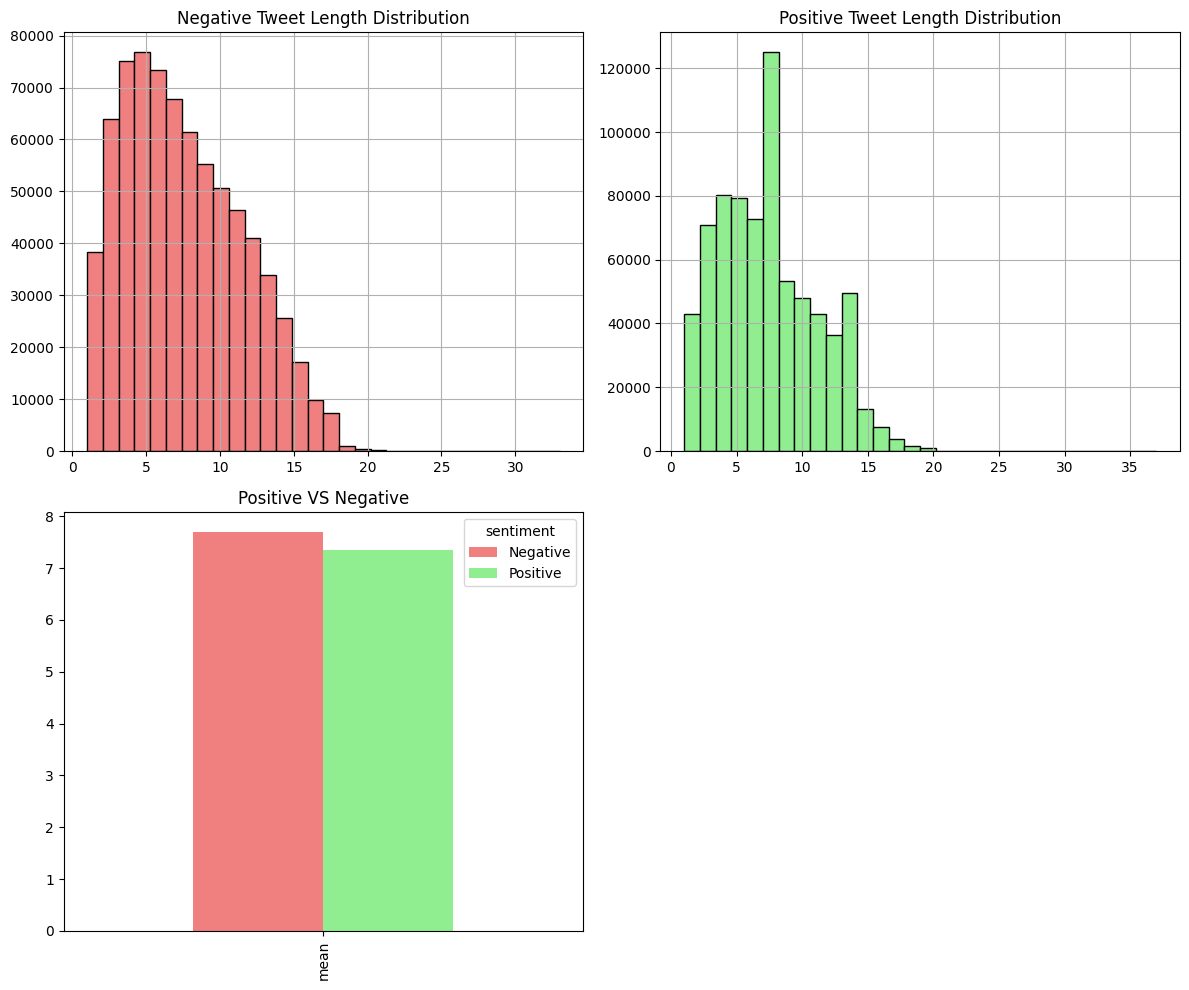

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


df[df["sentiment"]=="Negative"]["tweet_length"].hist(color="lightcoral", edgecolor="black", ax=axes[0, 0], bins=30)
df[df["sentiment"]=="Positive"]["tweet_length"].hist(color="lightgreen", edgecolor="black", ax=axes[0, 1], bins=30)
tweet_len.plot(kind="bar", color = ("lightcoral", "lightgreen"), ax = axes[1, 0] )

axes[0, 0].set_title("Negative Tweet Length Distribution")
axes[0, 1].set_title("Positive Tweet Length Distribution")
axes[1, 0].set_title("Positive VS Negative")
fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

# 3. Data Modeling
**"Data Modeling" is the next phase in our pipeline.
In this stage, we build and train models that can predict sentiment based on the processed tweet text.**

> ####  Here's an overview of what we typically do:
>
> 1. **Feature Extraction:** Convert cleaned tweet text into numerical features using techniques such as `TF-IDF`, `bag-of-words`, or `word embeddings`.
> 2. **Splitting the Data:** Divide the dataset into training and testing subsets to evaluate model performance.
> 3. **Model Selection:** Choose a suitable algorithm (like logistic regression, SVM, or deep learning models) for sentiment classification.
> 4. **Training the Model:** Fit the chosen model on the training data.
> 5. **Evaluation:** Assess model performance on the test set using metrics like accuracy, precision, recall, and F1-score.

> 1. **Feature Extraction:** In this stage, we will use the `Bag-of-Words` technique.
>
>* `Bag-of-Words` is a method for converting text data into numerical features that can be used by machine learning algorithms. The process involves:
>* **Vocabulary Creation:** Building a list of all unique words found in the corpus (in this case, all tweets).
>* **Vectorization:** Representing each tweet as a vector, where each element corresponds to the count (or frequency) of a word from the vocabulary in that tweet.
>* **Simplicity and Efficiency:** This technique ignores the grammar and word order, focusing solely on the occurrence of words, which makes it simple yet effective for many text classification tasks such as sentiment analysis.

![](https://vitalflux.com/wp-content/uploads/2021/08/Bag-of-words-technique-to-convert-to-numerical-feature-vector-png-640x212.png)

> **After applying the Bag-of-Words technique, we observed that 373,727 unique words (features) were extracted from the dataset. This represents the total vocabulary size used for vectorization.**

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=100000)
X = cv.fit_transform(df["clean_tweet"])
len(cv.get_feature_names_out())

100000

> **Now, we'll store our target variable in `y` after converting the labels to binary: negative becomes 0 and positive becomes 1.**

In [33]:
y = df["sentiment"].map({"Negative": 0, "Positive": 1})

> 2. **Splitting the Data to train and test**

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state =0)

## Model with LogisticRegression
  

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=500, solver='saga')
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=500, solver='saga')

In [36]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

## Model Evaluation (LogisticRegression)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.4f}%')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 75.5778%
Confusion Matrix:
[[141024  45145]
 [ 44921 137697]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76    186169
           1       0.75      0.75      0.75    182618

    accuracy                           0.76    368787
   macro avg       0.76      0.76      0.76    368787
weighted avg       0.76      0.76      0.76    368787



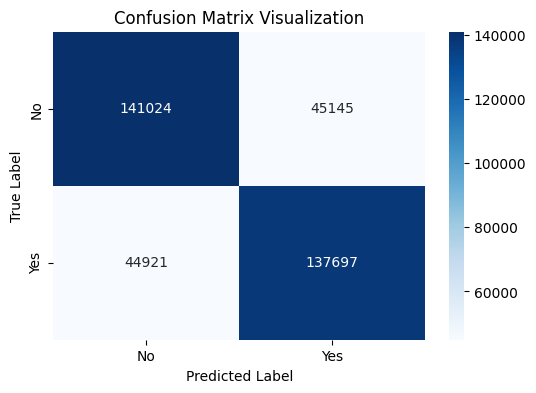

In [38]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Visualization")
plt.show()

> **Now, let's proceed and predict the sentiment of some sentences from our own input.**

In [39]:
sent = pd.DataFrame({"tweet": ["I am very happy today", "lol, i have depression"]})
sent["clean_tweet"] = sent["tweet"].apply(clean_tweet)
sent

,tweet,clean_tweet
0,I am very happy today,happi today
1,"lol, i have depression",lol depress


> **After displaying the results, we see that the model correctly predicted the sentiment for both sentences.**

In [40]:
pre = cv.transform(sent["clean_tweet"])
pre = scaler.transform(pre)
predict_sent = model.predict(pre)
predict_sent

array([1, 0])

In [42]:
import os
print(os.getcwd())  # shows current working directory


/content


In [43]:
import joblib

# Save model
joblib.dump(model, "your_model.pkl")

# save scaler
joblib.dump(scaler, "scaler.pkl")

# Save vectorizer
joblib.dump(cv, "your_vectorizer.pkl")


['your_vectorizer.pkl']

In [44]:
from google.colab import files
files.download("your_vectorizer.pkl")
files.download("your_model.pkl")
files.download("scaler.pkl")  # only if used


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>